Nesse notebook, irei dividir em três principais partes:


1.   Análise exploratória de dados: Serão feitas análises, hipóteses, ideias e gráficos. Além disso, irei explicar minha linha de raciocínio a cada passo relevante na análise.
2.   Aplicação do modelo de aprendizado de máquina
3.   Relatório - Também haverá um pdf apenas para essa parte



# Análise Exploratória de dados

In [49]:
# Importação de bibliotecas e carregamento de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_id = '1mbN02fVqmuaG8wMr7xdxLQXhdBvCLc1N'
url = f'https://drive.google.com/uc?id={file_id}'

df = pd.read_csv(url)
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [50]:
type(df)  # Confirmando o tipo para começar a análise

pandas.core.frame.DataFrame

In [51]:
df = df.drop(columns=['Unnamed: 0'], inplace=False)  # essa coluna não será util para a análise por conter apenas uma indexação

In [52]:
df.duplicated(subset=['Series_Title','Released_Year']).sum() # verificando filmes repetidos

np.int64(0)

In [53]:
df.isnull().sum() # verificando valores faltantes

,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0
Star1,0


In [54]:
df.info() # verificando os tipos de variáveis para manipulação

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB


In [55]:
df.describe() # analisando algumas estatísticas iniciais do dataframe

,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,842.000000,9.990000e+02
mean,7.947948,77.969121,2.716214e+05
std,0.272290,12.383257,3.209126e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.547150e+04
50%,7.900000,79.000000,1.383560e+05
75%,8.100000,87.000000,3.731675e+05
max,9.200000,100.000000,2.303232e+06


In [56]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing # analisando a regra dos 25% de dados faltantes no dataframe (caso seja maior que 25%, descartar)

,0
Series_Title,0.000000
Released_Year,0.000000
Certificate,10.110110
Runtime,0.000000
Genre,0.000000
IMDB_Rating,0.000000
Overview,0.000000
Meta_score,15.715716
Director,0.000000
Star1,0.000000


In [57]:
# transformando Gross para numerico para ser utilizado futuramente na analise
df['Gross'] = df['Gross'].str.replace(',', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

In [58]:
# o mesmo caso com o tempo do filme, mas dessa vez removendo "min"
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

In [59]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

In [60]:
df['No_of_Votes'] = pd.to_numeric(df['No_of_Votes'], errors='coerce')

In [62]:
df['Certificate'].fillna(df['Certificate'].mode()[0], inplace=True) # convém usar a moda pois não existe média e nem mediana para essa coluna pois seus valores são dados categóricos

In [64]:
df['Meta_score'].fillna(df['Meta_score'].median(), inplace=True) # mediana para evitar outliers

/tmp/ipython-input-1290130643.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Meta_score'].fillna(df['Meta_score'].median(), inplace=True) # mediana para evitar outliers


In [66]:
df['Gross'].fillna(df['Gross'].median(), inplace=True) # mesmo caso de meta_score

/tmp/ipython-input-1345982204.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gross'].fillna(df['Gross'].median(), inplace=True) # mesmo caso de meta_score


In [69]:
# Analisando os filmes mais bem avaliados do IMDB
df_rating_by_runtime = df.groupby(['Series_Title','IMDB_Rating'])['Runtime'].first().reset_index()
df_rating_by_runtime.sort_values(by='IMDB_Rating', ascending=False).head(30)

,Series_Title,IMDB_Rating,Runtime
787,The Godfather,9.2,175
788,The Godfather: Part II,9.0,202
767,The Dark Knight,9.0,152
1,12 Angry Men,9.0,96
835,The Lord of the Rings: The Return of the King,8.9,201
663,Schindler's List,8.9,195
621,Pulp Fiction,8.9,154
275,Fight Club,8.8,139
282,Forrest Gump,8.8,142
375,Inception,8.8,148


In [70]:
# Analisando os filmes mais bem avaliados pela crítica (Meta_score)
df.raiting_by_meta_score = df.groupby(['Series_Title','Meta_score'])['Runtime'].first().reset_index()
df.raiting_by_meta_score.sort_values(by='Meta_score', ascending=False).head(30)

/tmp/ipython-input-1412654724.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.raiting_by_meta_score = df.groupby(['Series_Title','Meta_score'])['Runtime'].first().reset_index()


,Series_Title,Meta_score,Runtime
949,Vertigo,100.0,128
928,Trois couleurs: Rouge,100.0,99
461,Lawrence of Arabia,100.0,228
366,Il conformista,100.0,113
151,Casablanca,100.0,102
632,Rear Window,100.0,112
565,Notorious,100.0,102
266,Fanny och Alexander,100.0,188
169,Citizen Kane,100.0,119
127,Boyhood,100.0,165


In [71]:
# Analisando os filmes pela avaliação do IMDB e o gênero
df_rating_by_genre = df.groupby(['Series_Title','Genre'])['IMDB_Rating'].first().reset_index()
df_rating_by_genre.sort_values(by='IMDB_Rating', ascending=False).head(30)

,Series_Title,Genre,IMDB_Rating
787,The Godfather,"Crime, Drama",9.2
788,The Godfather: Part II,"Crime, Drama",9.0
767,The Dark Knight,"Action, Crime, Drama",9.0
1,12 Angry Men,"Crime, Drama",9.0
835,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",8.9
663,Schindler's List,"Biography, Drama, History",8.9
621,Pulp Fiction,"Crime, Drama",8.9
275,Fight Club,Drama,8.8
282,Forrest Gump,"Drama, Romance",8.8
375,Inception,"Action, Adventure, Sci-Fi",8.8


É possível notar que o gênero Drama está entre um dos favoritos do público

In [72]:
# Verificando se a classificação segue o mesmo padrão
df_raiting_by_certificate = df.groupby(['Series_Title','Certificate'])['IMDB_Rating'].first().reset_index()
df_raiting_by_certificate.sort_values(by='IMDB_Rating', ascending=False).head(30)

,Series_Title,Certificate,IMDB_Rating
787,The Godfather,A,9.2
788,The Godfather: Part II,A,9.0
767,The Dark Knight,UA,9.0
1,12 Angry Men,U,9.0
835,The Lord of the Rings: The Return of the King,U,8.9
663,Schindler's List,A,8.9
621,Pulp Fiction,A,8.9
275,Fight Club,A,8.8
282,Forrest Gump,UA,8.8
375,Inception,UA,8.8


In [74]:
# verificando a quantidade de cada classificação
df_raiting_by_certificate.value_counts(['Certificate'])

,count
Certificate,
U,335
A,196
UA,175
R,146
PG-13,43
PG,37
Passed,34
G,12
Approved,11


In [76]:
# Verificando a quantidade das notas do IMDB
df['IMDB_Rating'].value_counts()

,count
IMDB_Rating,
7.7,157
7.8,151
8.0,141
8.1,127
7.6,123
7.9,106
8.2,67
8.3,44
8.4,31


Agora vamos para a visualização de gráficos


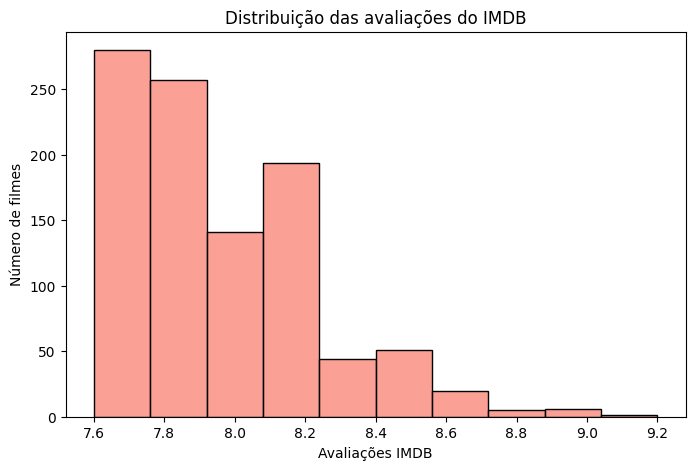

In [77]:
plt.figure(figsize=(8, 5))
sns.histplot(df['IMDB_Rating'],  bins=10, color='salmon')
plt.title('Distribuição das avaliações do IMDB')
plt.xlabel('Avaliações IMDB')
plt.ylabel('Número de filmes')
plt.show()

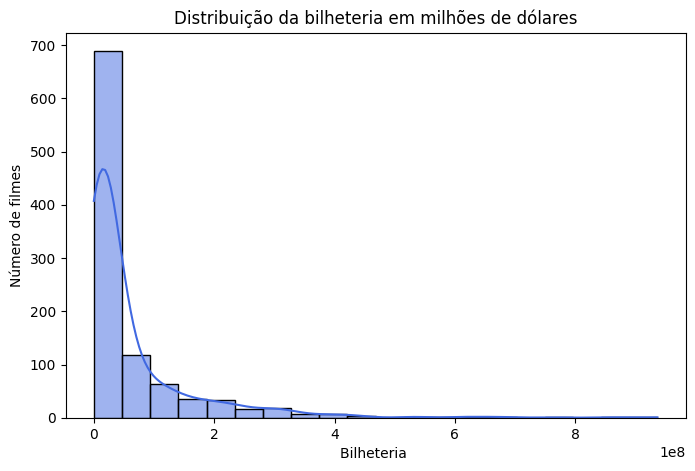

In [79]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Gross'], kde = True, bins=20, color='royalblue')
plt.title('Distribuição da bilheteria em milhões de dólares')
plt.xlabel('Bilheteria ')
plt.ylabel('Número de filmes')
plt.show()

In [81]:
# Verificando se há alguma relação entre a bilheteria e as avaliações do IMDB
df_raiting_by_gross = df.groupby(['Series_Title','Gross'])['IMDB_Rating'].first().reset_index()
df_raiting_by_gross.sort_values(by='IMDB_Rating', ascending=False).head(30)

,Series_Title,Gross,IMDB_Rating
787,The Godfather,134966411.0,9.2
788,The Godfather: Part II,57300000.0,9.0
767,The Dark Knight,534858444.0,9.0
1,12 Angry Men,4360000.0,9.0
835,The Lord of the Rings: The Return of the King,377845905.0,8.9
663,Schindler's List,96898818.0,8.9
621,Pulp Fiction,107928762.0,8.9
275,Fight Club,37030102.0,8.8
282,Forrest Gump,330252182.0,8.8
375,Inception,292576195.0,8.8


Até aqui, podemos tirar algumas conclusões:


*   O faturamento não possui relação com as avaliações do IMDB
*   As avaliações do IMDB não está relacionado com o Meta_score (crítica)



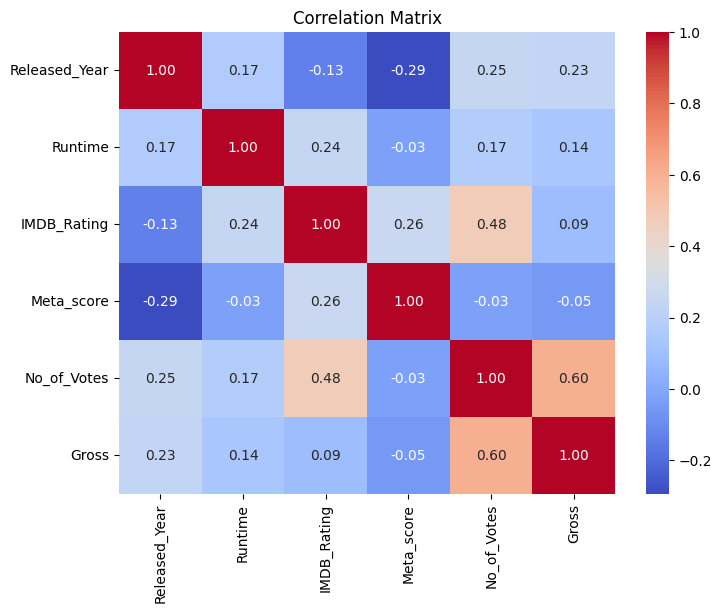

In [82]:
# Para verificar as hipóteses, é necessário uma matriz de correlação, para verificar se há alguma relação linear entre as colunas
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()

Até aqui é possível concluir que:



*   O faturamento dos filmes não tem muita relação com as notas do IMDB nem as notas das críticas, mas sim com o número de votos, o que leva a crer que os filmes mais populares são os que mais obtém faturamento.
*   A nota no IMDB tem uma relação moderada com o numero de votos.




Agora, analisarei a relação dos diretores dos filmes com as outras colunas

In [84]:
min_movies = 4 # determinei um número mínimo para os filmes de cada diretor

# quero analisar a média dos diretores nas notas do IMDB, do faturamento e da avaliação das críticas
diretores_populares = df.groupby('Director').agg(
    media_imdb = ('IMDB_Rating', 'mean'),
    media_gross = ('Gross', 'mean'),
    media_meta = ('Meta_score', 'mean'),
    total_filmes = ('Series_Title', 'count')
).reset_index()
diretores_populares = diretores_populares[diretores_populares['total_filmes'] >= min_movies]
diretores_populares.sort_values(by='media_imdb', ascending=False) # nesse caso estou verificando qual diretor possui a maior média nas avaliações do IMDB na coluna "media_imdb" criada

,Director,media_imdb,media_gross,media_meta,total_filmes
83,Christopher Nolan,8.462500,2.421818e+08,77.500000,8
137,Francis Ford Coppola,8.400000,6.936480e+07,85.800000,5
383,Peter Jackson,8.400000,3.194625e+08,79.400000,5
74,Charles Chaplin,8.333333,5.804723e+06,87.000000,6
449,Sergio Leone,8.266667,7.823284e+06,77.500000,6
463,Stanley Kubrick,8.233333,2.824289e+07,84.111111,9
9,Akira Kurosawa,8.220000,1.453013e+07,85.000000,10
140,Frank Capra,8.200000,1.521872e+07,82.000000,4
391,Quentin Tarantino,8.175000,9.087929e+07,78.250000,8
394,Rajkumar Hirani,8.175000,1.070600e+07,76.000000,4


In [86]:
diretores_populares.sort_values(by='media_gross', ascending=False) # Verificando pela média de faturamento

,Director,media_imdb,media_gross,media_meta,total_filmes
36,Anthony Russo,8.075000,5.512599e+08,72.750000,4
202,James Cameron,8.080000,3.496473e+08,80.200000,5
383,Peter Jackson,8.400000,3.194625e+08,79.400000,5
58,Brad Bird,7.900000,2.749069e+08,87.750000,4
83,Christopher Nolan,8.462500,2.421818e+08,77.500000,8
380,Pete Docter,8.125000,2.407099e+08,86.000000,4
426,Robert Zemeckis,8.120000,2.098893e+08,76.400000,5
470,Steven Spielberg,8.030769,1.906256e+08,80.538462,13
438,Sam Mendes,8.000000,1.745348e+08,78.750000,4
208,James Mangold,7.925000,1.292569e+08,76.500000,4


In [89]:
diretores_populares.sort_values(by='media_meta', ascending=False) # verificando pela média das críticas (Meta_score)

,Director,media_imdb,media_gross,media_meta,total_filmes
237,John Ford,7.900000,1.619546e+07,91.200000,5
241,John Huston,7.900000,1.091461e+07,91.000000,5
22,Alfred Hitchcock,8.007143,1.688547e+07,90.714286,14
283,Krzysztof Kieslowski,7.850000,2.208310e+06,89.750000,4
20,Alfonso Cuarón,7.750000,1.010171e+08,88.166667,6
42,Asghar Farhadi,7.975000,2.734454e+06,88.000000,4
58,Brad Bird,7.900000,2.749069e+08,87.750000,4
408,Richard Linklater,7.900000,9.289284e+06,87.000000,6
101,David Lean,8.100000,5.622790e+07,87.000000,4
431,Roman Polanski,8.000000,2.208244e+07,87.000000,5


Com isso podemos ver uma relação entre quais filmes são mais aclamados pelo público e os diretores. Diretores como Christopher Nolan, Peter Jackson e Francis Ford possuem filmes muito bem aclamados pelo publico, o que eleva suas medias nos votos do IMDB. Porém, como verificado anteriormente, as notas do IMDB não possuem muita relação com o faturamento, fazendo com que os diretores mais aclamados não sejam necessariamente os que mais faturam em seus filmes

In [90]:
# Agora irei fazer uma manipulação na coluna de gêneros para analisar posteriormente
df_genre = df.assign(Generos = df['Genre'].str.split(',')).explode('Generos')
df_genre['Generos'] = df_genre['Generos'].str.strip()
df_genre.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Generos
0,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime
0,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Drama
1,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action
1,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Crime
1,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Drama


/tmp/ipython-input-2342424525.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='magma', orient='h')


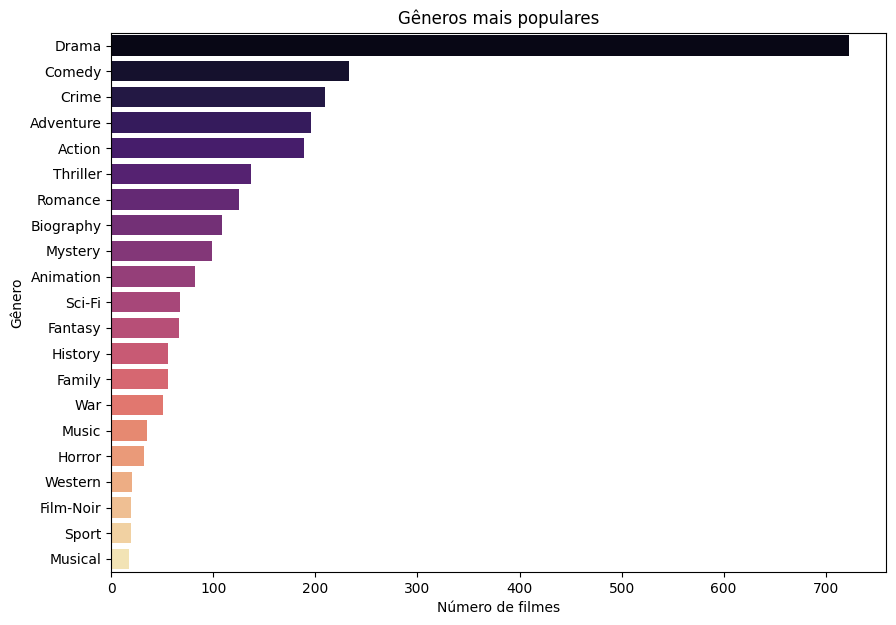

In [92]:
# Verificando quais gêneros são mais comuns entre os filmes
plt.figure(figsize=(10, 7))
genre_counts = df_genre['Generos'].value_counts()
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='magma', orient='h')
plt.title('Gêneros mais populares')
plt.xlabel('Número de filmes')
plt.ylabel('Gênero')
plt.show()

Nessa parte irei verificar se assim como os diretores, existem atores que são mais populares entre o público

In [94]:
# fazendo uma manipulação nas colunas dos atores.
df_atores = df[['Series_Title','IMDB_Rating','Gross']].copy()
df_atores['Ator'] = df[['Star1','Star2','Star3','Star4']].values.tolist()
df_atores = df_atores.explode('Ator')
print(df_atores)

        Series_Title  IMDB_Rating        Gross               Ator
0      The Godfather          9.2  134966411.0      Marlon Brando
0      The Godfather          9.2  134966411.0          Al Pacino
0      The Godfather          9.2  134966411.0         James Caan
0      The Godfather          9.2  134966411.0       Diane Keaton
1    The Dark Knight          9.0  534858444.0     Christian Bale
..               ...          ...          ...                ...
997         Lifeboat          7.6   23457439.5     William Bendix
998     The 39 Steps          7.6   23457439.5       Robert Donat
998     The 39 Steps          7.6   23457439.5  Madeleine Carroll
998     The 39 Steps          7.6   23457439.5     Lucie Mannheim
998     The 39 Steps          7.6   23457439.5     Godfrey Tearle

[3996 rows x 4 columns]


In [98]:
# aplicando a mesma lógica da parte dos diretores
min_filmes = 4

atores_populares = (
    df_atores.groupby('Ator')
    .agg(
        media_imdb=('IMDB_Rating','mean'),
        media_gross=('Gross','mean'),
        total_filmes=('Series_Title','count')

    )
    .reset_index()
)

atores_populares = atores_populares[atores_populares['total_filmes'] >= min_filmes]
atores_populares = atores_populares.sort_values(by='media_imdb', ascending=False) # nesse caso estou ordenando os atores pela média do imdb
print(atores_populares)

                   Ator  media_imdb   media_gross  total_filmes
1919      Orlando Bloom    8.600000  3.353390e+08             4
1662      Marlon Brando    8.425000  5.900948e+07             4
391     Charles Chaplin    8.333333  5.804723e+06             6
368       Carrie Fisher    8.300000  2.537911e+08             4
1415       Kevin Spacey    8.300000  6.463809e+07             5
...                 ...         ...           ...           ...
1268        Johnny Depp    7.733333  5.945925e+07             9
571   Denzel Washington    7.711111  7.687442e+07             9
779      Franka Potente    7.700000  8.954050e+07             4
1409        Kevin Bacon    7.700000  1.032358e+08             6
2249    Samantha Morton    7.650000  3.789142e+07             4

[144 rows x 4 columns]


/tmp/ipython-input-3369167657.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='media_imdb', y='Ator', data=top_10_atores, palette='magma', orient='h')


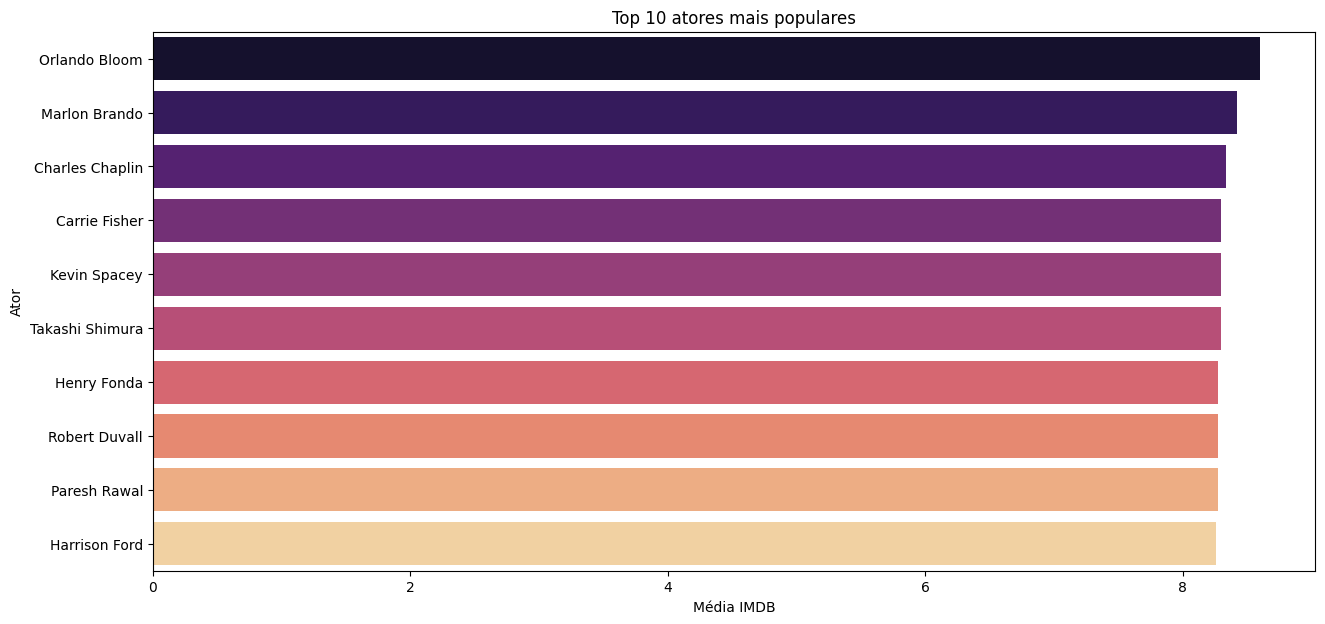

In [99]:
# plotando o gráfico
plt.figure(figsize=(15, 7))
top_10_atores = atores_populares.head(10)
sns.barplot(x='media_imdb', y='Ator', data=top_10_atores, palette='magma', orient='h')
plt.title("Top 10 atores mais populares")
plt.xlabel("Média IMDB")
plt.ylabel("Ator")
plt.show()


In [100]:
atores_por_faturamento = atores_populares.sort_values(by='media_gross', ascending=False) # agora pela média de faturamento
print(atores_por_faturamento)

                   Ator  media_imdb   media_gross  total_filmes
1204          Joe Russo    8.075000  5.512599e+08             4
2136  Robert Downey Jr.    7.971429  4.470105e+08             7
2698        Zoe Saldana    7.775000  4.280690e+08             4
426         Chris Evans    7.900000  3.899441e+08             6
1919      Orlando Bloom    8.600000  3.353390e+08             4
...                 ...         ...           ...           ...
1593     Mads Mikkelsen    7.900000  6.139618e+06             4
2422    Takashi Shimura    8.300000  5.969577e+06             4
391     Charles Chaplin    8.333333  5.804723e+06             6
2305     Shah Rukh Khan    8.050000  5.753672e+06             6
1320        Julie Delpy    7.920000  4.452056e+06             5

[144 rows x 4 columns]


/tmp/ipython-input-1007671553.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='media_gross', y='Ator', data=top_10_atores_por_faturamento, palette='magma', orient='h')


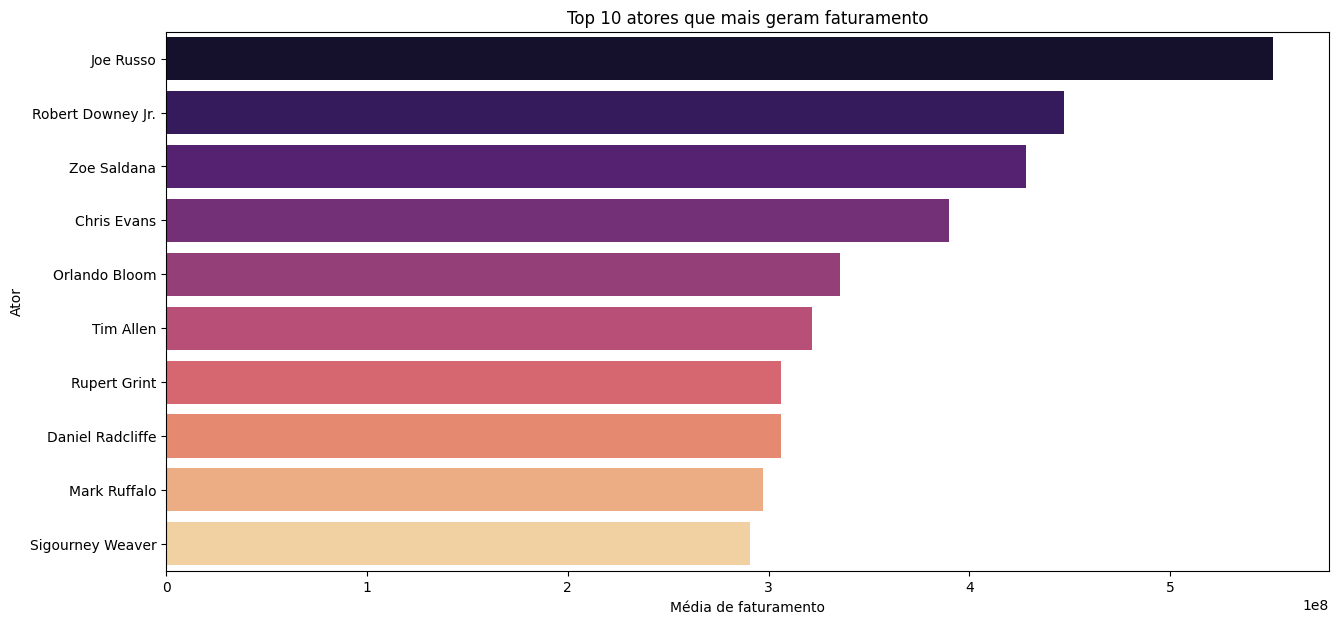

In [102]:
# Plotando o gráfico
plt.figure(figsize=(15, 7))
top_10_atores_por_faturamento = atores_por_faturamento.head(10)
sns.barplot(x='media_gross', y='Ator', data=top_10_atores_por_faturamento, palette='magma', orient='h')
plt.title("Top 10 atores que mais geram faturamento")
plt.xlabel("Média de faturamento")
plt.ylabel("Ator")
plt.show()

Com isso, concluímos a hipótese inicial, o faturamento não tem relação com as notas do IMDB

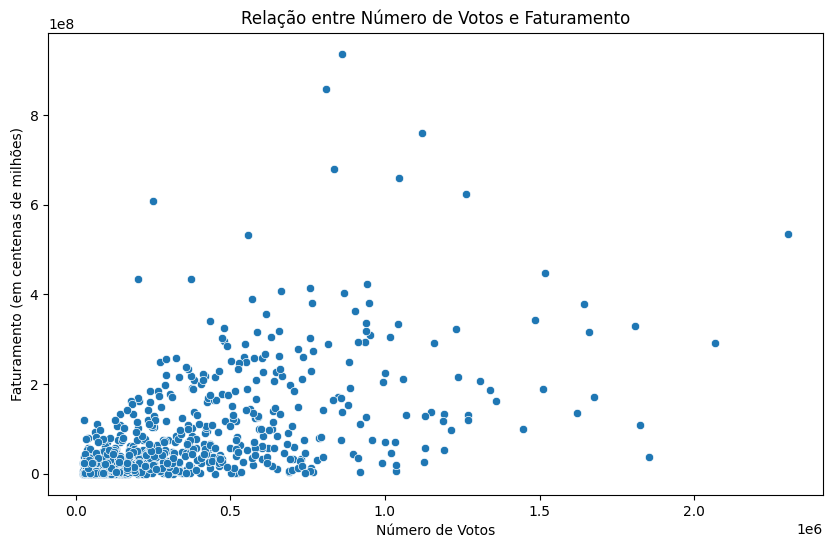

In [103]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='No_of_Votes', y='Gross')
plt.title('Relação entre Número de Votos e Faturamento')
plt.xlabel('Número de Votos')
plt.ylabel('Faturamento (em centenas de milhões)')
plt.show()

Existe uma relação positiva entre os números de votos e o faturamento. Assim, quanto mais votos, mais um filme irá faturar. Porém, para um mesmo valor de número de votos, existe uma grande variação no faturamento, indicando que a relação não é perfeita. Sendo assim, o faturamento depende de outros fatores,

In [104]:
# Dessa vez, irei analisar a relação da classificação com o faturamento
faturamento_por_class = df.groupby('Certificate')['Gross'].mean()
print(faturamento_por_class.sort_values(ascending=False))

Certificate
UA          1.237616e+08
A           6.056183e+07
U           5.882142e+07
G           4.523984e+07
PG-13       3.569293e+07
U/A         2.602096e+07
R           2.561759e+07
16          2.345744e+07
TV-14       2.345744e+07
TV-MA       2.345744e+07
PG          1.984501e+07
TV-PG       1.567385e+07
Approved    1.445284e+07
Passed      1.126616e+07
GP          7.089580e+05
Unrated     3.000000e+05
Name: Gross, dtype: float64


Dando uma pesquisada nas classificações, verifiquei que as diferentes classificações segue padrões dos EUA, India e outras partes do mundo, portanto muitas delas representam a "mesma" classificação. Dessa forma, irei agrupar os dados.

In [105]:
# Unindo os tipos de classificação

classificacao_unidas = {
    'G': 'G',
    'U': 'G',
    'GP': 'G',
    'Approved': 'G',
    'Passed': 'G',
    'TV-PG': 'G',

    'PG': 'PG',
    'PG-13': 'PG',
    'U/A': 'PG',
    'TV-14': 'PG',

    'A': 'R',
    'R': 'R',
    '16': 'R',
    'TV-MA': 'R',


}  # Unrated foi tirado porque apenas um filme tem essa classificação no dataframe inteiro
df['Classificacao'] = df['Certificate'].map(classificacao_unidas)

df_classific = df.groupby('Classificacao')['Gross'].agg("sum").reset_index()
df_classific = df_classific.sort_values(by='Gross', ascending=False)


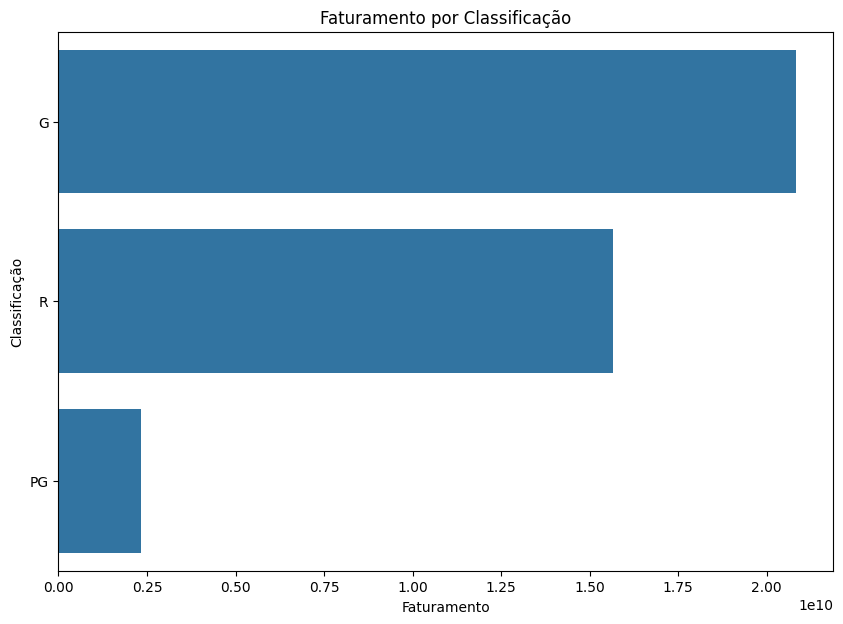

In [106]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Gross', y='Classificacao', data=df_classific)
plt.title('Faturamento por Classificação')
plt.xlabel('Faturamento')
plt.ylabel('Classificação')
plt.show()

Note que:
G - Livre para todos os públicos
R - Precisa de acompanhamento dos pais caso seja menor de 17 anos
PG - Orientação dos pais sugerida

In [107]:
# Agora iremos ver o faturamento total e medio por genero

df_genres_gross_sum = df_genre.groupby('Generos')['Gross'].agg(['sum','mean']).sort_values(by='sum', ascending=False)
print(df_genres_gross_sum)

                    sum          mean
Generos                              
Drama      3.044838e+10  4.211394e+07
Adventure  2.878421e+10  1.468582e+08
Action     2.280742e+10  1.206742e+08
Comedy     1.323314e+10  5.679461e+07
Sci-Fi     9.170355e+09  1.368710e+08
Animation  8.925686e+09  1.088498e+08
Crime      7.847687e+09  3.754874e+07
Thriller   7.087780e+09  5.173562e+07
Fantasy    6.317118e+09  9.571390e+07
Biography  5.609525e+09  5.146353e+07
Romance    4.740631e+09  3.792504e+07
Family     4.648427e+09  8.300763e+07
Mystery    3.818910e+09  3.857485e+07
History    2.693147e+09  4.809190e+07
War        1.737301e+09  3.406473e+07
Music      1.133265e+09  3.237899e+07
Horror     1.114626e+09  3.483207e+07
Sport      1.019768e+09  5.367202e+07
Western    9.501312e+08  4.750656e+07
Musical    3.531629e+08  2.077429e+07
Film-Noir  2.412523e+08  1.269749e+07


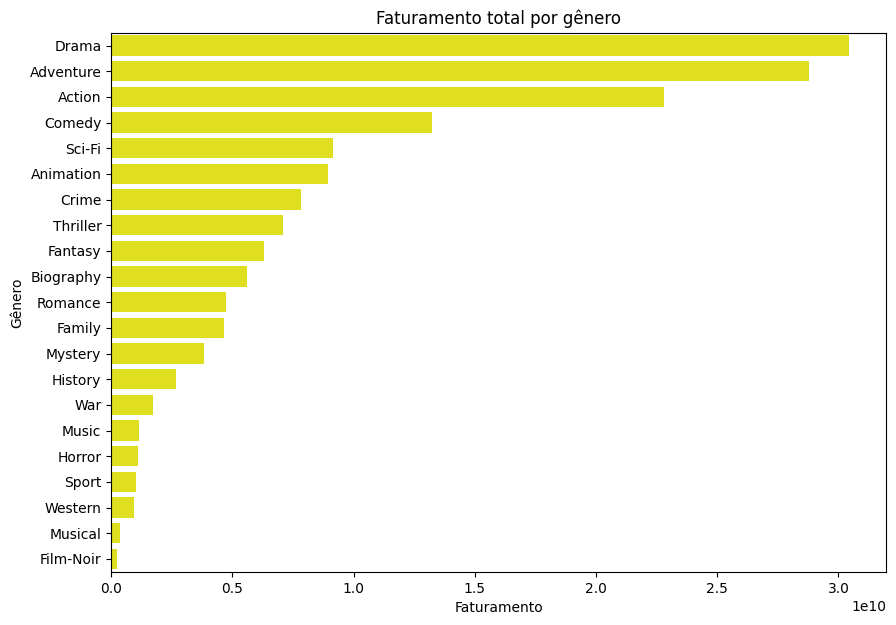

In [108]:
plt.figure(figsize=(10, 7))
sns.barplot(x='sum', y=df_genres_gross_sum.index, data=df_genres_gross_sum, color = 'yellow')
plt.title('Faturamento total por gênero')
plt.xlabel('Faturamento')
plt.ylabel('Gênero')
plt.show()

In [109]:
df_genres_gross_mean = df_genre.groupby('Generos')['Gross'].agg(['sum','mean']).sort_values(by='mean', ascending=False)
print(df_genres_gross_mean)

                    sum          mean
Generos                              
Adventure  2.878421e+10  1.468582e+08
Sci-Fi     9.170355e+09  1.368710e+08
Action     2.280742e+10  1.206742e+08
Animation  8.925686e+09  1.088498e+08
Fantasy    6.317118e+09  9.571390e+07
Family     4.648427e+09  8.300763e+07
Comedy     1.323314e+10  5.679461e+07
Sport      1.019768e+09  5.367202e+07
Thriller   7.087780e+09  5.173562e+07
Biography  5.609525e+09  5.146353e+07
History    2.693147e+09  4.809190e+07
Western    9.501312e+08  4.750656e+07
Drama      3.044838e+10  4.211394e+07
Mystery    3.818910e+09  3.857485e+07
Romance    4.740631e+09  3.792504e+07
Crime      7.847687e+09  3.754874e+07
Horror     1.114626e+09  3.483207e+07
War        1.737301e+09  3.406473e+07
Music      1.133265e+09  3.237899e+07
Musical    3.531629e+08  2.077429e+07
Film-Noir  2.412523e+08  1.269749e+07


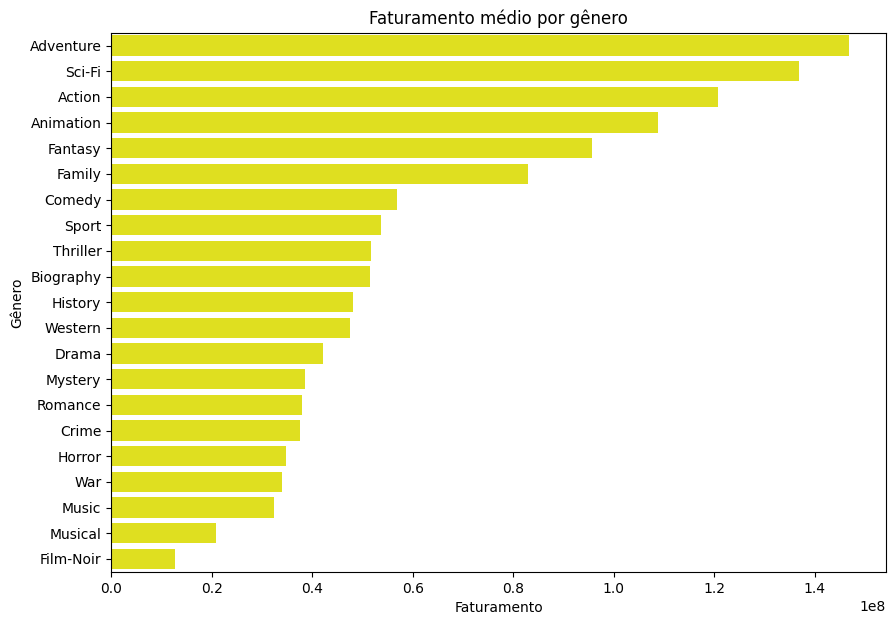

In [112]:
plt.figure(figsize=(10, 7))
plt.title('Faturamento médio por gênero')
plt.xlabel('Faturamento')
plt.ylabel('Gênero')
sns.barplot(x='mean', y=df_genres_gross_mean.index, data=df_genres_gross_mean, color = 'yellow')
plt.show()

In [113]:
# Agora irei verificar a relação de gênero e avaliações no IMDB
df_genre_imdb = df_genre.groupby('Generos')['IMDB_Rating'].agg(['mean','count']).sort_values(by='mean', ascending=False)
print(df_genre_imdb)

               mean  count
Generos                   
War        8.013725     51
Western    8.000000     20
Film-Noir  7.989474     19
Sci-Fi     7.977612     67
Mystery    7.967677     99
Drama      7.957538    723
Crime      7.954545    209
History    7.953571     56
Adventure  7.952041    196
Action     7.948677    189
Musical    7.947059     17
Biography  7.935780    109
Fantasy    7.931818     66
Animation  7.930488     82
Sport      7.926316     19
Romance    7.925600    125
Music      7.914286     35
Family     7.912500     56
Thriller   7.909489    137
Comedy     7.903433    233
Horror     7.887500     32


Com isso, verificamos que apesar de existir vários filmes do gênero Drama, ele não é o que mais fatura em média, apenas o total por possuir uma grande quantidade de filmes.


# Aplicação do modelo de aprendizado de máquina

In [121]:
# Importando as bibliotecas necessárias para o aprendizado de máquina
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import pickle


In [129]:
# Como irei fazer uma regressão, é necessário transformar as colunas categóricas em númericas
# Nesse caso irei fazer uma técnica chamada One-Hot encoding
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df.dropna(subset=['Released_Year', 'Runtime'], inplace=True)
target = 'IMDB_Rating'
numerical_features = ['Runtime', 'No_of_Votes', 'Gross', 'Released_Year'] # Não vou incluir genres aqui pois preciso fazer o tratamento antes
df_genre_exploded = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre') # segue a mesma lógica que fiz anteriormente
genre_dummies = pd.get_dummies(df_genre_exploded['Genre'], prefix='Genre') # Cada linha recebe 1 na coluna correspondente ao gênero que ela tem, e 0 nas outras.
df_genres_encoded = genre_dummies.groupby(genre_dummies.index).sum() # agrupando pelo indice original

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   998 non-null    object 
 1   Released_Year  998 non-null    float64
 2   Certificate    998 non-null    object 
 3   Runtime        998 non-null    int64  
 4   Genre          998 non-null    object 
 5   IMDB_Rating    998 non-null    float64
 6   Overview       998 non-null    object 
 7   Meta_score     998 non-null    float64
 8   Director       998 non-null    object 
 9   Star1          998 non-null    object 
 10  Star2          998 non-null    object 
 11  Star3          998 non-null    object 
 12  Star4          998 non-null    object 
 13  No_of_Votes    998 non-null    int64  
 14  Gross          998 non-null    float64
 15  Classificacao  822 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 132.5+ KB


In [130]:
# concatenando os dois datasets para o conjunto de entrada e definindo o meu target que irei prever
X = pd.concat([df[numerical_features], df_genres_encoded], axis=1)
y = df[target]

In [131]:
# dividindo o dataframe em conjunto de teste e de treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler() # para normalizar os dados
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features]) # aplicando a fórmula de transformação
X_test[numerical_features] = scaler.transform(X_test[numerical_features])  # aplicando a fórmula de transformação
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # chamando o RandomForest e definindo seus hiperparametros
model.fit(X_train, y_train) # treinando o modelo

RandomForestRegressor(n_jobs=-1, random_state=42)

In [133]:
# Verificando as métricas do modelo de regressão treinado
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("--- Performance do Modelo de Previsão de Nota ---")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")
print(f"Erro Médio Absoluto (MAE): {mae:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.4f}\n")

--- Performance do Modelo de Previsão de Nota ---
Coeficiente de Determinação (R²): 0.4028
Erro Médio Absoluto (MAE): 0.1526
Raiz do Erro Quadrático Médio (RMSE): 0.1983



# Prevendo a nota do filme The Shawshank Redemption

In [137]:
filename = 'modelo_filmes_ISRAELVALCAREGGI.pkl' # nome do arquivo para salvar o modelo
with open(filename, 'wb') as file: # escreve o arquivo em binario

    pickle.dump(model, file) # salva o arquivo model

print(f"\nModelo salvo com sucesso no arquivo '{filename}'")
#carregando e testando o modelo
with open('modelo_filmes_ISRAELVALCAREGGI.pkl', 'rb') as file:

    loaded_model = pickle.load(file)

print(f"Modelo '{filename}' carregado com sucesso.")


predicted_rating_loaded = loaded_model.predict(new_movie_full)

print("\n--- Testando o modelo carregado ---")
print(f"A previsão do modelo carregado é: {predicted_rating_loaded[0]:.2f}")


# Criando um dicionário com os dados do novo filme
new_movie_data = {
    'Released_Year': 1994,
    'Runtime': 142,
    'Meta_score': 80.0,
    'No_of_Votes': 2343110,
    'Gross': 28341469
}
new_movie_df = pd.DataFrame([new_movie_data]) # transformando em dataframe

new_movie_genres = pd.DataFrame(0, index=new_movie_df.index, columns=df_genres_encoded.columns) # Adicionando as colunas de gênero (inicialmente com zeros)
new_movie_genres['Genre_Drama'] = 1 # Ativando a coluna do gênero específico do filme manualmente
new_movie_full = pd.concat([new_movie_df, new_movie_genres], axis=1) # concatenando os dataframes
new_movie_full = new_movie_full.reindex(columns=X_train.columns, fill_value=0) # fazendo com que o novo DataFrame tenha as mesmas colunas e ordem do X_train
new_movie_full[numerical_features] = scaler.transform(new_movie_full[numerical_features]) # normalizando os dados
predicted_rating = model.predict(new_movie_full) # aplicando o modelo

print("--- Previsão para 'The Shawshank Redemption' ---")
print(f"A nota do IMDB prevista pelo modelo é: {predicted_rating[0]:.2f}")


Modelo salvo com sucesso no arquivo 'modelo_filmes_ISRAELVALCAREGGI.pkl'
Modelo 'modelo_filmes_ISRAELVALCAREGGI.pkl' carregado com sucesso.

--- Testando o modelo carregado ---
A previsão do modelo carregado é: 8.81
--- Previsão para 'The Shawshank Redemption' ---
A nota do IMDB prevista pelo modelo é: 8.81


# Relatório

Esse relatório visa responder às questões do desafio técnico proposto.

1. Análise Exploratória de Dados (EDA)
A análise iniciou-se com a preparação e limpeza dos dados para explorar possíveis hipóteses do DataFrame.
Primeiramente, as colunas com dados faltantes (Certificate, Meta-score e Gross) foram tratadas. A coluna Certificante preenchida com a moda, já que a coluna é categórica, enquanto Meta-score e Gross foram preenchidas com a mediana para lidar melhor com os outliers. Além disso, houve conversões nos tipos, para possibilitar a melhor exibição nos gráficos, análise estatística e cálculos.
A análise inicial revelou que o sucesso de um filme, que é medida pelas avaliações das críticas, não está diretamente ligado com seu sucesso financeiro. O principal fator que afeta o faturamento de um filme é sua popularidade (quantidade de votos), com uma relação de 0,60 na matriz de correlação. No entanto, a relação entre a avaliação do IMDB e o faturamento é fraca.  Portanto, filmes que geram mais engajamento e discussão (resultando em mais votos) tendem a faturar mais. A popularidade de um filme são indicadores de bilheterias mais fortes do que sua avaliação crítica ou do público. O mesmo padrão segue para a análise de diretores e atores, onde os mais aclamados pela crítica não são, necessariamente, os que geram maior receita.
O gênero Drama é o que se destaca, sendo ele o mais comum no conjunto de dados. Aparecendo em franquias bem consolidadas como “The Dark Night” e “The Godfather”, indicando uma preferência do público por esse gênero. No entanto, o gênero Drama domina apenas em quantidade, enquanto gêneros como Aventura, Ação e SCI-FI possuem maior média de faturamento.
Além disso, foram exploradas as diversas classificações presentes no DataFrame. Após agrupar as diferentes classificações (EUA, Índia, etc.) em categorias globais (G, PG, R), notou-se que filmes com classificações que sugerem orientação dos pais, foram os que alcançaram a maior média de faturamento, possivelmente por atingirem um público mais amplo.


2.
Com base nas análises, o melhor filme a se recomendar é Dark Knight, devido a seu sucesso em bilheteria, nas críticas do público e por ser dirigido por Christopher Nolan, o diretor mais aclamado, além de juntar os gêneros mais populares como Ação, Crime, e Drama.
A principal coluna que está relacionada ao faturamento de um filme, conforme visto anteriormente, é o número de votos. Além disso, atores e diretores populares como Robert Downey Jr, Chris Evans e Anthony Russo, presentes em franquias de grande sucesso (Vingadores) possuem uma forte influência no engajamento e consequentemente no número de votos.
Baseado nas palavras utilizadas podemos extrair emoções, temas e narrativas, e com base nisso, poderíamos fazer uma relação para verificar o que interessa mais ao público. É totalmente possível inferir o gênero do filme com base na sinopse, é um problema de classificação, onde é possível associar palavras a gêneros específicos e daí tirar uma conclusão.

3.
A nota do IMDB, por ser um valor numérico e contínuo, se encaixaria num problema de regressão. Nesse caso, eu utilizaria variáveis que intuitivamente influenciaram, além de utilizar meus insights da análise anterior. Assim, as variáveis de entrada seriam: Genre, Released_Year, No_of_Votes, Runtime e Gross. Para isso, seria necessário pré processar os dados, como Genre é uma variável categórica, eu utilizaria a técnica One-Hot-Encoding, que visa transformar os gêneros em colunas numéricas, isso se deve ao fato de que o modelo de regressão apenas aceita variáveis numéricas. Além disso, as demais colunas utilizadas  foram transformadas em numéricas. O modelo escolhido foi o RandomForest, pois ele é robusto e consegue extrair relações não lineares entre as colunas, além de possuir um alto desempenho. O maior problema de se usar esse modelo é seu alto custo computacional.  As medidas de desempenho utilizadas foram: RMSE(Raiz do Erro Quadrático Médio), R²(Coeficiente de Determinação) e MAE(Erro Médio Absoluto). Elas foram utilizadas pois, RMSE é a métrica mais comum em problemas de regressão e é muito útil para identificar a presença de grandes erros, pois eles são amplificados pelo processo de elevação ao quadrado. R² é uma forma de explicar o quão bem as variáveis de entrada conseguem prever a variável de saída. Já o MAE, pela sua facilidade de interpretação, pois ele estão na mesma unidade da variável preditora

